# Logistic Regression Assignment

- Run the below cells. If you have the data in a different directory, you'll need to change the url.
- Complete all of the numbered questions. You may call any packages that we've used in class.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/employee-turnover-balanced.csv')
df.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   left_company                   1000 non-null   object
 1   age                            1000 non-null   int64 
 2   frequency_of_travel            1000 non-null   object
 3   department                     1000 non-null   object
 4   commuting_distance             1000 non-null   int64 
 5   education                      1000 non-null   int64 
 6   satisfaction_with_environment  1000 non-null   int64 
 7   gender                         1000 non-null   object
 8   seniority_level                1000 non-null   int64 
 9   position                       1000 non-null   object
 10  satisfaction_with_job          1000 non-null   int64 
 11  married_or_single              1000 non-null   object
 12  last_raise_pct                 1000 non-null   int64 
 13  last

In [3]:
df.describe()

,age,commuting_distance,education,satisfaction_with_environment,seniority_level,satisfaction_with_job,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.713000,9.593000,2.864000,2.597000,1.909000,2.621000,15.244000,3.166000,10.20600,6.420000,3.857000,2.065000,3.754000
std,9.366556,8.118452,1.029837,1.122431,1.067642,1.120095,3.752939,0.372267,7.73637,6.165518,3.513815,3.094568,3.500534
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,2.000000,2.000000,2.000000,1.000000,2.000000,12.000000,3.000000,5.00000,2.000000,2.000000,0.000000,1.000000
50%,34.000000,8.000000,3.000000,3.000000,2.000000,3.000000,14.000000,3.000000,9.00000,5.000000,2.000000,1.000000,2.000000
75%,42.000000,15.000000,4.000000,4.000000,2.000000,4.000000,18.000000,3.000000,13.00000,9.000000,7.000000,2.000000,7.000000
max,60.000000,29.000000,5.000000,4.000000,5.000000,4.000000,25.000000,4.000000,40.00000,40.000000,18.000000,15.000000,17.000000


## Data Definitions
- `left_company`: Whether individual left the company or not. This is the target variable.  
- `age`: Age of individual. 
- `frequency_of_travel`: How often person travels for work.  
- `department`: Department person works(worked).  
- `commuting_distance`: Distance person lives from office.  
- `education`: Highest education category.  
- `satisfaction_with_environment`: Satisfaction of environment, on lickert scale.  
- `gender`: Gender of individual.  
- `seniority_level`: Seniority level of individual.  
- `position`: Last position held at the company.  
- `satisfaction_with_job`: Satisfaction of their job, on lickert scale.  
- `married_or_single`: Marital status of person.  
- `last_raise_pct`: Percent increase their last raise represented.  
- `last_performance_rating`: Most recent annual performance rating, on lickert scale.  
- `total_years_working`: Number of years the individual has spent working in their career.  
- `years_at_company`: Number of years the individual has been at the company, regardless of position.  
- `years_in_current_job`: Number of years the individual has been in their current position.  
- `years_since_last_promotion`: Years since the person had their last promotion.  
- `years_with_current_supervisor`: Years the person has had their current supervisor.

# Question 1
- What is the distribution of the target (`left_company`)?  
- Do you have any concerns on class imbalances?

<AxesSubplot:>

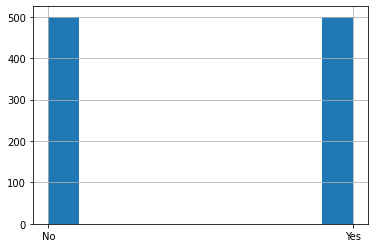

In [4]:
df.left_company.hist()

In [5]:
getattr(df, 'left_company').describe()

count     1000
unique       2
top         No
freq       500
Name: left_company, dtype: object

There are frequency of 500 for each unique fields. That means there are no Imbalances

# Question 2
- Create and print a list of the variables that you would treat as numerical and another list for the variables that you would treat as categorical.  
- Explain your choices.

In [6]:
numerical_Vars = []
categorical_Vars = []
def splitting(data_frame):
    for column in data_frame.columns:
        if data_frame[column].dtype == 'int64' or data_frame[column].dtype == 'float64':
            numerical_Vars.append(column)
        elif data_frame[column].dtype == 'object':
            categorical_Vars.append(column)

    return print("The numerical features are:", numerical_Vars ,"\n and The categorical features are:", categorical_Vars)

In [7]:
splitting(df)

The numerical features are: ['age', 'commuting_distance', 'education', 'satisfaction_with_environment', 'seniority_level', 'satisfaction_with_job', 'last_raise_pct', 'last_performance_rating', 'total_years_working', 'years_at_company', 'years_in_current_job', 'years_since_last_promotion', 'years_with_current_supervisor'] 
 and The categorical features are: ['left_company', 'frequency_of_travel', 'department', 'gender', 'position', 'married_or_single']


In [8]:
for col in categorical_Vars:
    unique_vals = df[col].unique()
    print(f"{col}\t{len(unique_vals)}")
    print(unique_vals)

left_company	2
['No' 'Yes']
frequency_of_travel	3
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
department	3
['Sales' 'Research & Development' 'Human Resources']
gender	2
['Male' 'Female']
position	9
['Sales Executive' 'Laboratory Technician' 'Manufacturing Director'
 'Healthcare Representative' 'Manager' 'Research Scientist'
 'Research Director' 'Sales Representative' 'Human Resources']
married_or_single	3
['Divorced' 'Married' 'Single']



The dataset has two distinct values, "yes" or "no," in the column "Left company." Similarly, all the columns listed under the "List of Categorical Variables" have a limited number of discrete values. In contrast, all the columns listed under the "List of Numerical Variables" have a range of continuous values. This means that the categorical variables are composed of separate and distinct categories, while the numerical variables are composed of a range of values that are measurable and can take any value within a certain range

# Question 3
- Determine if any numerical variables risk multicolinearity.  
- Remove those variables (if any) from your numerical_vars list.  
- Why did you or did not remove any?

In [9]:
df_corr = df[numerical_Vars].corr()
print(df_corr)

                                    age  commuting_distance  education  \
age                            1.000000            0.012074   0.199138   
commuting_distance             0.012074            1.000000   0.033003   
education                      0.199138            0.033003   1.000000   
satisfaction_with_environment  0.001556           -0.019556  -0.059586   
seniority_level                0.522604            0.038915   0.080685   
satisfaction_with_job          0.095242            0.023859   0.015148   
last_raise_pct                 0.027851            0.104421   0.013515   
last_performance_rating        0.003629            0.089282  -0.014162   
total_years_working            0.673804            0.025593   0.160822   
years_at_company               0.384760            0.023017   0.091614   
years_in_current_job           0.310010            0.031890   0.073181   
years_since_last_promotion     0.242456            0.047552   0.077218   
years_with_current_supervisor  0.27367

In [10]:
import seaborn as sns

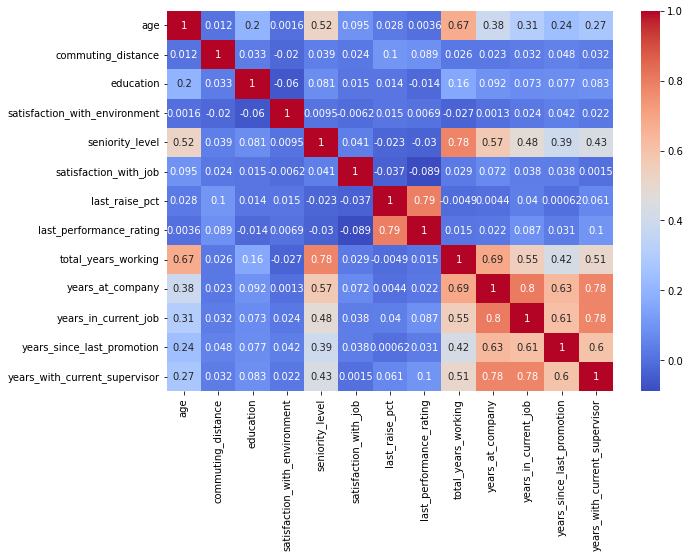

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(df[numerical_Vars].corr(), cmap='coolwarm', annot=True)
plt.show()

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant



X = df[numerical_Vars]

X = add_constant(X)

vif = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
                index=X.columns)
print('Variance Inflation Factor (VIF):')
print(vif)


Variance Inflation Factor (VIF):
const                            139.180236
age                                1.936914
commuting_distance                 1.017191
education                          1.056972
satisfaction_with_environment      1.012122
seniority_level                    2.626717
satisfaction_with_job              1.037685
last_raise_pct                     2.744391
last_performance_rating            2.794610
total_years_working                4.488986
years_at_company                   4.702972
years_in_current_job               3.502896
years_since_last_promotion         1.805935
years_with_current_supervisor      3.235829
dtype: float64


The report on variance inflation factor suggests that none of the columns have a high VIF value, which is typically considered to be 5 or more. Therefore, based on this information, the decision was made not to remove any columns due to collinearity.

# Question 4
- Split the data into training and test sets.  
- Use 20% of the data for test and a random state of 124.  

In [13]:
y = df['left_company']
X = df.drop('left_company', axis=1)


In [14]:
import numpy as np

# Set random seed : https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html
np.random.seed(124)

# Split data into training and test sets
mask = np.random.rand(len(df)) < 0.80
X_train = df[mask].drop('left_company', axis=1)
X_test = df[~mask].drop('left_company', axis=1)
y_train = df[mask]['left_company']
y_test = df[~mask]['left_company']


# Question 5
- Create a pipeline to process the numerical data.  
- Create a pipeline to process the categorical data.  

Verify each pipeline contains the columns you would expect using a fit_transform on the training data, i.e., print the shapes of the fit_transforms for each pipeline.

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])

cat_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))])

In [16]:
processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, numerical_Vars)])

In [17]:
temp_df = processing_pipeline.fit_transform(df)

In [18]:
print('Training examples: {:,}'.format(X_train.shape[0]))
print('Test examples: {:,}'.format(X_test.shape[0]))


Training examples: 809
Test examples: 191


In [19]:
temp_df.shape

(1000, 13)

# Question 6
- Create a pipeline that combines the pre-processing and implements a logistic regression model.  
- Print the accuracy on the training set and the test set.
- Do you have any concerns of overfitting based on the differences between the two accuracy scores?

In [20]:
processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, numerical_Vars),
                                                      ('create_dummies', cat_pipeline, categorical_Vars[1:])])

In [21]:
from sklearn.linear_model import LogisticRegression

modeling_pipeline = Pipeline([('data_processing', processing_pipeline), 
                              ('lm', LogisticRegression())
                             ])
modeling_pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['age', 'commuting_distance',
                                                   'education',
                                                   'satisfaction_with_environment',
                                                   'seniority_level',
                                                   'satisfaction_with_job',
                                                   'last_raise_pct',
                                                   'last_performance_rating',
                                                   'to...
                                                   'years_in_current_job',
                                                   'years_since_last_promotion',
                                                   'years_with_current_supervisor']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['frequency_of_travel',
                                                   'department', 'gender',
                                                   'position',
                                                   'married_or_single'])])),
                ('lm', LogisticRegression())])

In [22]:
y_pred = modeling_pipeline.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score


accuracy = (y_test == y_pred).mean()
print(f'Accuracy on testing dataset: {accuracy:.3f}')


Accuracy on testing dataset: 0.665


In [24]:
y_pred_train = modeling_pipeline.predict(X_train)

accuracy = accuracy_score(y_train, y_pred_train)
print(f'Accuracy on training dataset: {accuracy:.3f}')

Accuracy on training dataset: 0.713


Upon careful analysis, there does not seem to be any evidence of overfitting. While there may be a difference of 5-7%, this alone is not enough to definitively indicate overfitting.

# Question 7
What would you recommend as potential next steps for continuing to develop and evaluate a model?

For further development of a model, we can prevent overfitting by using regularization techniques. Overfitting occurs when a model learns to fit the training data too closely and fails to generalize well to new data. Regularization helps to prevent this by adding a penalty term to the model's objective function, which discourages it from fitting the training data too closely.